In [14]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import pyreadr

from load_data import open_charac, add_general_charac
from binaryclass_memory import *

## Load data

In [15]:
general_charac = pyreadr.read_r('../data/Characteristics_masterfiles/General_characteristics/EPFL_gene_master_matrix.RData')['gene_master_matrix']

names = ['AE3', 'AE4', 'AE7', 'BIDDY_D0', 'BIDDY_D0_2', 'BIDDY_D6', 'BIDDY_D6_2', 'BIDDY_D15', 'BIDDY_D15_2',
        'LK_D2_exp1_library_d2_1', 'LK_D2_exp1_library_d2_2', 'LK_D2_exp1_library_d2_3', 'LK_LSK_D2_exp3_library_d2_1', 
        'LK_LSK_D2_exp3_library_d2_2', 'LK_LSK_D2_exp3_library_d2_3', 'LK_LSK_D2_exp3_library_d2_4', 
        'LK_LSK_D2_exp3_library_d2_5', 'LSK_D2_exp1_library_LSK_d2_1', 'LSK_D2_exp1_library_LSK_d2_2', 'LSK_D2_exp1_library_LSK_d2_3',
       'LSK_D2_exp2_library_d2A_1', 'LSK_D2_exp2_library_d2A_2', 'LSK_D2_exp2_library_d2A_3' , 'LSK_D2_exp2_library_d2A_4', 'LSK_D2_exp2_library_d2A_5', 
       'LSK_D2_exp2_library_d2B_1','LSK_D2_exp2_library_d2B_2', 'LSK_D2_exp2_library_d2B_3', 'LSK_D2_exp2_library_d2B_4', 'LSK_D2_exp2_library_d2B_5']
charac_matrix = []
norm_matrix = []
families_matrix = []
for name in names:
    #Open characteristics file
    charac_out_path = '../data/Characteristics_masterfiles/Dataset_specific_characteristics/' + name + '__characteristics_output.txt'
    p_value_path = '../data/Characteristics_masterfiles/Memory_genes/P_value_estimate_CV2_ofmeans_' + name + '.txt'
    charac_matrix.append(open_charac(charac_out_path, p_value_path, 200))
    
    #Open normalized data
    norm_path = '../data/merged_data/' + name + '.csv'
    fam_path = '../data/merged_data/y_' + name + '.csv'
    norm = pd.read_csv (norm_path)
    norm = norm.set_index('Unnamed: 0')
    families= np.squeeze(np.array(pd.read_csv(fam_path)))
    
    norm_matrix.append(norm)
    families_matrix.append(families)

In [16]:
#Add general characteristic
for i in range(0,len(charac_matrix)):
    charac_matrix[i] = add_general_charac(charac_matrix[i], general_charac)
    charac_matrix[i] = charac_matrix[i].drop(['CV2ofmeans_residuals','cell_cycle_dependence', 'skew', 'CV2ofmeans', 'exon_expr_median', 'exon_expr_mean'], axis=1)
    charac_matrix[i] = charac_matrix[i].dropna()

In [17]:
charac_matrix[0].columns

Index(['skew_residuals', 'mean_expression', 'memory_gene', 'length', 'GC',
       'Pou5f1', 'Myc', 'Nanog', 'Sox2', 'Dnmt3a', 'Dnmt1', 'H3K27me3',
       'H3K4me3', 'H3K27ac', 'H3K9me3', 'H2Aub1', 'Cbx5', 'Ctnnb1', 'Srebf1'],
      dtype='object')

# Visualization data

AE3
100.0 % of the outliers are memory genes


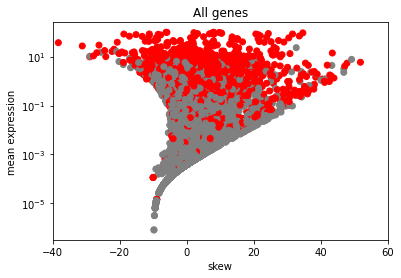

AE4
93.33333333333333 % of the outliers are memory genes


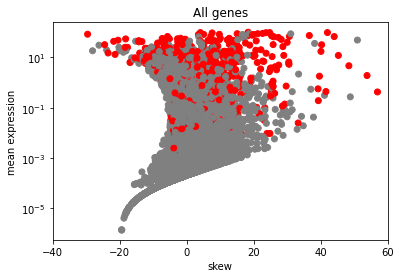

AE7
80.0 % of the outliers are memory genes


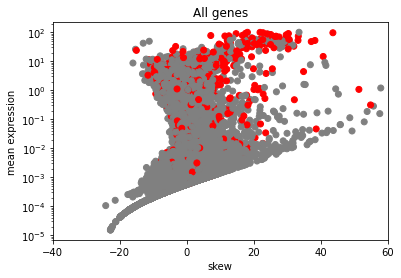

BIDDY_D0
85.71428571428571 % of the outliers are memory genes


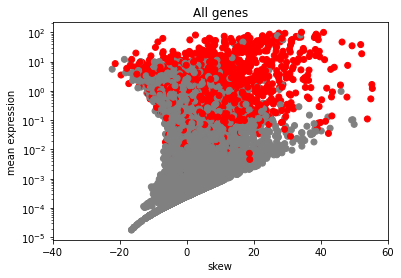

BIDDY_D0_2
84.21052631578948 % of the outliers are memory genes


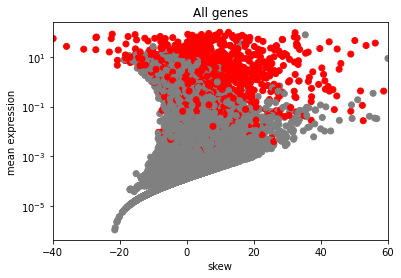

BIDDY_D6
100.0 % of the outliers are memory genes


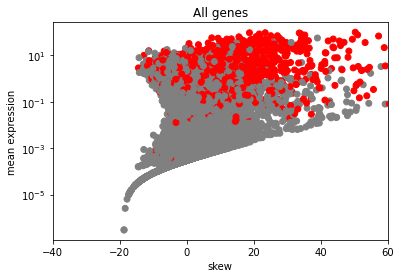

BIDDY_D6_2
66.66666666666667 % of the outliers are memory genes


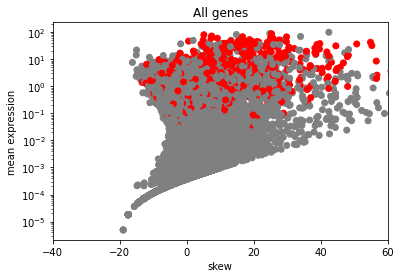

BIDDY_D15
90.0 % of the outliers are memory genes


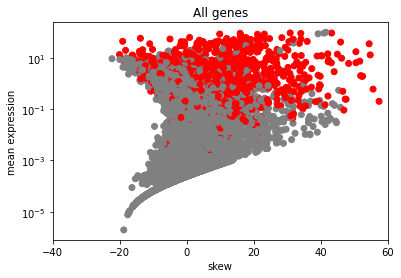

BIDDY_D15_2
71.42857142857143 % of the outliers are memory genes


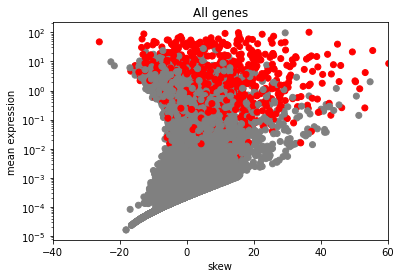

LK_D2_exp1_library_d2_1
85.71428571428571 % of the outliers are memory genes


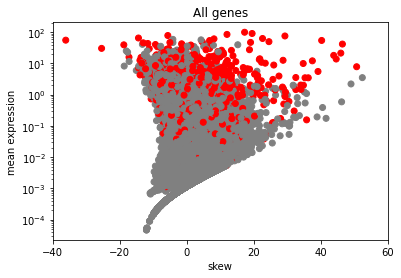

LK_D2_exp1_library_d2_2
100.0 % of the outliers are memory genes


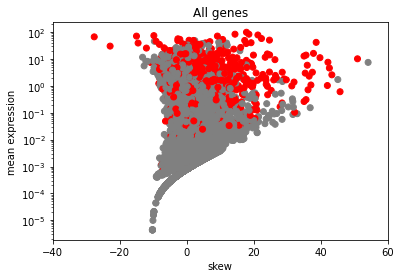

LK_D2_exp1_library_d2_3
83.33333333333333 % of the outliers are memory genes


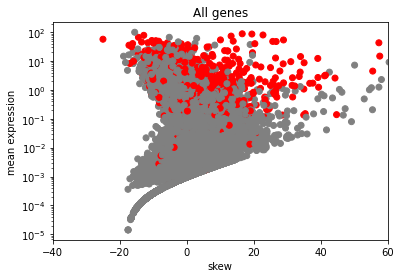

LK_LSK_D2_exp3_library_d2_1
60.0 % of the outliers are memory genes


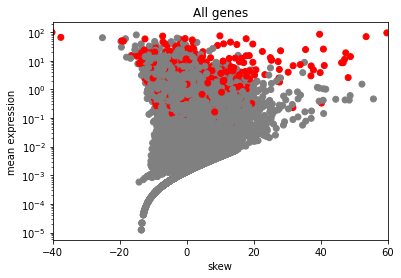

LK_LSK_D2_exp3_library_d2_2
100.0 % of the outliers are memory genes


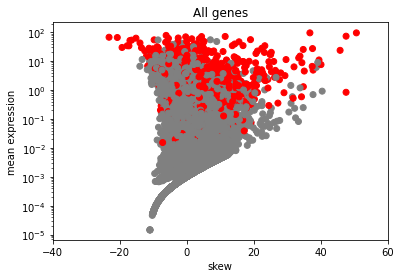

LK_LSK_D2_exp3_library_d2_3
100.0 % of the outliers are memory genes


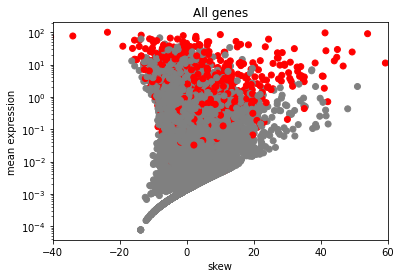

LK_LSK_D2_exp3_library_d2_4
100.0 % of the outliers are memory genes


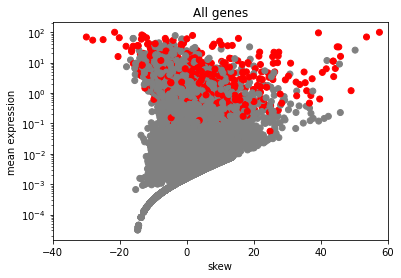

LK_LSK_D2_exp3_library_d2_5
80.0 % of the outliers are memory genes


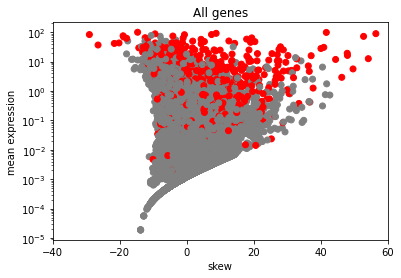

LSK_D2_exp1_library_LSK_d2_1
62.5 % of the outliers are memory genes


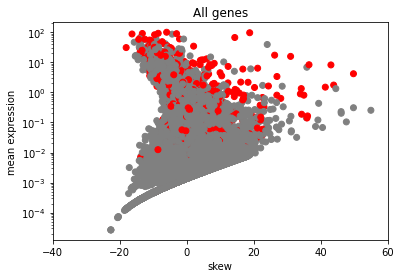

LSK_D2_exp1_library_LSK_d2_2
100.0 % of the outliers are memory genes


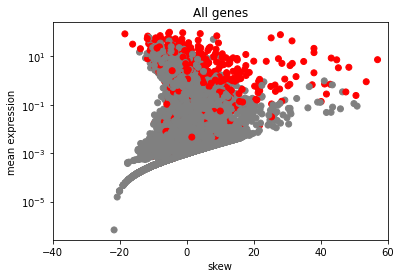

LSK_D2_exp1_library_LSK_d2_3
100.0 % of the outliers are memory genes


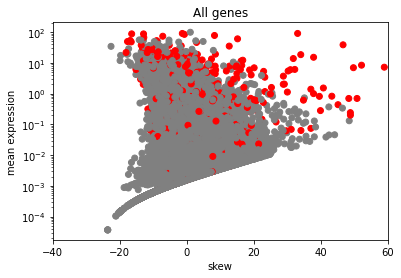

LSK_D2_exp2_library_d2A_1
100.0 % of the outliers are memory genes


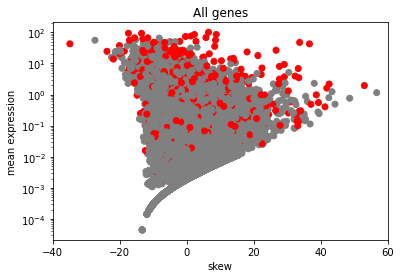

LSK_D2_exp2_library_d2A_2
83.33333333333333 % of the outliers are memory genes


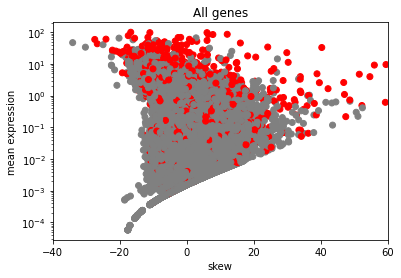

LSK_D2_exp2_library_d2A_3
100.0 % of the outliers are memory genes


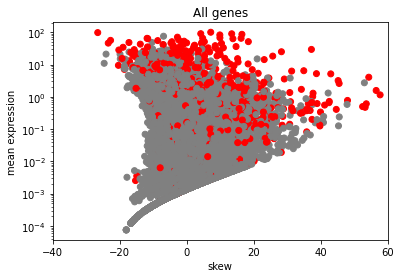

LSK_D2_exp2_library_d2A_4
100.0 % of the outliers are memory genes


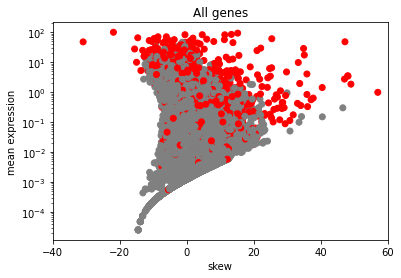

LSK_D2_exp2_library_d2A_5
100.0 % of the outliers are memory genes


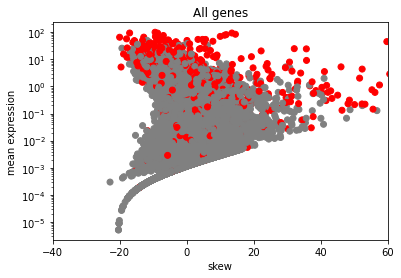

LSK_D2_exp2_library_d2B_1
100.0 % of the outliers are memory genes


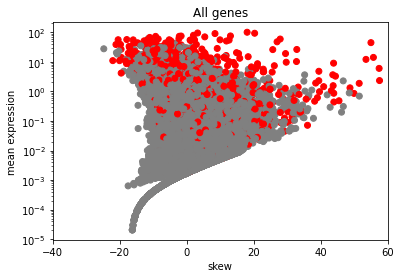

LSK_D2_exp2_library_d2B_2
85.71428571428571 % of the outliers are memory genes


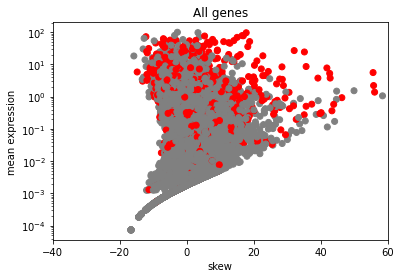

LSK_D2_exp2_library_d2B_3
100.0 % of the outliers are memory genes


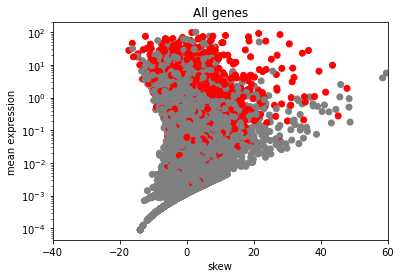

LSK_D2_exp2_library_d2B_4
100.0 % of the outliers are memory genes


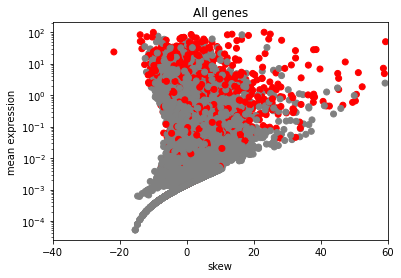

LSK_D2_exp2_library_d2B_5
100.0 % of the outliers are memory genes


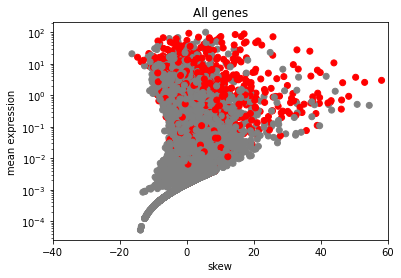

In [5]:
for i,charac in enumerate(charac_matrix):
    print(names[i])
    visualize_charac(charac)

# Fuse charac data 

In [6]:
#Remove AE7, also keep BIDDYD15_2 and LSK_D2_exp1_library_LSK_d2_1
val = [8,17]
data_to_fuse = [0,1,3,4,5,6,7,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29] 

for data in charac_matrix:
    #Normalize skew_residuals, same for mean_expression after removing outliers
    charac_matrix[i], outliers = remove_extreme_values(charac_matrix[i], k=200)
    charac_matrix[i]['skew_residuals'], charac_matrix[i]['mean_expression'] = normalize(charac_matrix[i]['skew_residuals']), normalize(charac_matrix[i]['mean_expression'])

val_charac =  []
for i in val:
    val_charac.append(charac_matrix[i])
fused_charac = []
for i in data_to_fuse:
    fused_charac.append(charac_matrix[i])
    
fused_charac = pd.concat(fused_charac)
print(fused_charac)

                    skew_residuals  mean_expression  memory_gene   length  \
ENSMUSG00000000001       -0.303586         2.971940         True   3262.0   
ENSMUSG00000000028       -0.339190         1.114685        False   2143.0   
ENSMUSG00000000031        0.524936         0.004354        False   2286.0   
ENSMUSG00000000037       -0.025268         0.170690         True   1257.0   
ENSMUSG00000000056        0.004084         0.257542        False   4395.0   
...                            ...              ...          ...      ...   
ENSMUSG00000118669       13.328775         0.038381        False   4698.0   
ENSMUSG00000118670       17.895395         0.009120        False  22800.0   
ENSMUSG00000118672       16.117295         0.123645        False  12361.0   
ENSMUSG00001074846       23.004653         0.003285        False    943.0   
ENSMUSG00002076083       11.849282         0.094818        False   2723.0   

                       GC  Pou5f1    Myc  Nanog   Sox2  Dnmt3a  Dnmt1  \
EN

In [ ]:
def fit_evaluate_all(data_charac:pd.DataFrame, fit_func:str, feat:list lamb:float=1, kernel:str='rbf', verbose:bool=True):
    X = np.array(data_charac.iloc[: , feat])
    Y = np.array(data_charac['memory_gene'])
    
    #Fit classifier to charac data
    if fit_func == 'logreg':
        clf, score = fit_logistic_reg(X, Y, 'l2', lamb)
    if fit_func == 'svm':
        clf, score = fit_svm(X, Y, lamb, kernel)

    #Evaluate fitted classifier
    y = clf.predict(X)
    non_memory_gene = list(data_charac[data_charac['memory_gene'] == False].index)
    memory_gene = list(data_charac[data_charac['memory_gene'] == True].index)
    y = pd.DataFrame(y, index = data_charac.index, columns = ['pred'])
    y['true_label'] = Y

    y_non_mem = y.loc[non_memory_gene]
    y_mem = y.loc[memory_gene]
    recovery = np.sum(y_mem['pred'])/len(memory_gene)
    false_pos = np.sum(y_non_mem['pred'])
      
    scores = [score, recovery, false_pos]
    
    if verbose:
        print('accuracy: ',score)
        print('recovery memory genes: ', recovery)
        print('false postive: ', false_pos)
        
    return scores
def predict_evaluate(data_charac)
#Evaluate extracted subset on RNAseq Data
    gene_subset = list(y[y['pred']==True].index)
    
    precision, recovery_clust = np.NaN, np.NaN
    if gene_subset:
        norm_subset = np.array(norm.loc[gene_subset].T)

        model = FamiliesClusters(np.unique(family),compute_precision,True)
        pred = model.fit_predict(norm_subset,family)
        precision, recovery_clust = model.score_, model.recovery
        

# Logistic regression

In [18]:
feat = [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
score = fit_evaluate(charac_matrix[0], norm_matrix[0], families_matrix[0], 'logreg', [0,1], penalty = 'l2', lamb = 0.00001, verbose =True)

accuracy:  0.798975979650387
recovery memory genes:  0.38069368992895947
false postive:  1218
Precision and recovery clustering:  0.520618556701031 0.7417417417417418


In [16]:
#Select the features with highest clustering precision
indices_max = []
for i, data in enumerate(charac_matrix):
    feat_sets =[[4,5],[3,5],[1,5],[2,5],[1,2,5],[3,4,5],[1,3,5],[2,4,5],[1,2,3,4,5]]
    name_feat = [list(data[0].iloc[: , feat].columns) for feat in feat_sets] 
    name_feat = [', '.join(names) for names in name_feat]
    scores = ['accuracy', 'recovery', 'FP', 'Clustering precision', 'Clustering recovery']

    score_sets = []
    for feat in feat_sets:
        score_sets.append(fit_evaluate(data, norm_matrix[i], families_matrix[i], 'logreg', feat, penalty = 'l2', lamb = 1, verbose = False))

    scores_df = pd.DataFrame(score_sets, index = name_feat, columns= scores)
    scores_df.to_csv('../data/binaryClass_scores/featSelecLogreg/' + names[i] + 'logreg.csv', index=True)
    
    #Get best features indices
    ind_max = np.squeeze(np.argmax(np.array(scores_df['Clustering precision'])))
    indices_max.append(feat_sets[ind_max])
    
pd.DataFrame(indices_max).to_csv('../data/binaryClass_scores/featSeleclogreg/' + 'bestFeat' + '.csv', index=True)

In [46]:
#Try different penalties
feat = [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
for i, data in enumerate(charac_matrix):
    penalty = ['l1', 'l2', 'none']
    scores = ['accuracy', 'recovery', 'FP', 'Clustering precision', 'Clustering recovery']
    score_pen = []
    for pen in penalty:
            score_pen.append(fit_evaluate(data, norm_matrix[i], families_matrix[i], 'logreg', feat, penalty = pen, lamb = 1, solver = 'saga', verbose = False))
    scores_df = pd.DataFrame(score_pen, index = penalty, columns= scores)
    scores_df.to_csv('../data/binaryClass_scores/tryPenalties/' + names[i] + '.csv', index=True)

C:\Users\alexi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\alexi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\alexi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


KeyboardInterrupt: 

AE3
AE3


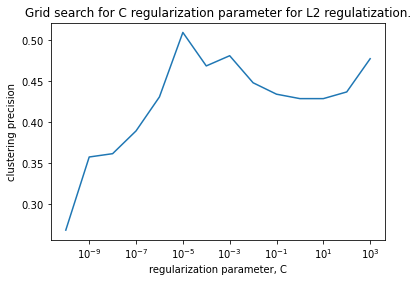

------
AE4


KeyboardInterrupt: 

In [65]:
#Grid search of penalty values
#L2 regularization
plot = True
scores = ['accuracy', 'recovery', 'FP', 'Clustering precision', 'Clustering recovery']
feat = [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

indices_max = []
for i, data in enumerate(charac_matrix):
    C = np.logspace(-10, 3, 14)
    scores_grid = []
    for lamb in C:
        scores_grid.append(fit_evaluate(data, norm_matrix[i], families_matrix[i], 'logreg', feat, penalty = 'l2', lamb = lamb, verbose = False))
    
    scores_df = pd.DataFrame(scores_grid, index = C, columns= scores)
    scores_df.to_csv('../data/binaryClass_scores/L2reglogreg/' + names[i] + '.csv', index=True)
    
    #Get best best reg indices
    ind_max = np.squeeze(np.argmax(np.array(scores_df['Clustering precision']) + np.array(scores_df['Clustering recovery'])))
    indices_max.append(C[ind_max])
    
    if plot:
        print(names[i])
        plt.plot(C,scores_df['Clustering precision'])
        plt.title('Grid search for C regularization parameter for L2 regulatization.')
        plt.xlabel('regularization parameter, C')
        plt.xscale('log')
        plt.ylabel('clustering precision')
        plt.show()
        print('------')  
        
pd.DataFrame(indices_max).to_csv('../data/binaryClass_scores/L2reglogreg/bestFeat.csv', index=True)

# Support vector machine

In [5]:
kernels = ['linear','rbf', 'poly', 'sigmoid']
for kern in kernels:

    print(kern)
    fit_evaluate(charac_matrix[0], norm_matrix[0], families_matrix[0], 'svm', [3,5], kernel = kern, verbose =True)

linear


KeyboardInterrupt: 

## RBF kernel

In [3]:
#Select the features with highest clustering precision
indices_max = []
for i, data in enumerate(charac_matrix):
    feat_sets =[[4,5],[3,5],[1,5],[2,5],[1,2,5],[3,4,5],[1,3,5],[2,4,5],[1,2,3,4,5]]
    name_feat = [list(data.iloc[: , feat].columns) for feat in feat_sets] 
    name_feat = [', '.join(names) for names in name_feat]
    scores = ['accuracy', 'recovery', 'FP', 'Clustering precision', 'Clustering recovery']
    
    score_sets = []
    for feat in feat_sets:
        score_sets.append(fit_evaluate(data, norm_matrix[i], families_matrix[i], 'svm', feat = feat, kernel = 'rbf', verbose =False))

    scores_df = pd.DataFrame(score_sets, index = name_feat, columns= scores)
    scores_df.to_csv('../data/binaryClass_scores/featSelecRBFSVM/' + names[i] + '.csv', index=True)
    
    #Get best features indices
    prec_rec = scores_df['Clustering precision'] + scores_df['Clustering recovery']
    ind_max = np.squeeze(np.argmax(np.array(prec_rec)))
    indices_max.append(feat_sets[ind_max])
    
pd.DataFrame(indices_max).to_csv('../data/binaryClass_scores/featSelecRBFSVM/bestFeat.csv', index=True)

KeyError: 0

In [13]:
def fit_evaluate(data_charac:pd.DataFrame, norm:pd.DataFrame, family:np.array, fit_func:str, feat:list, penalty:str =None, lamb:float=1, solver:str='lbfgs', kernel:str='rbf', degree:int=3, gamma:int='scale', verbose:bool=True):
    data_charac = data_charac.dropna(subset=['skew_residuals', 'mean_expression'])
    X = np.array(data_charac.iloc[: , feat])
    Y = np.array(data_charac['memory_gene'])
    
    #Fit classifier to charac data
    if fit_func == 'logreg':
        clf, score = fit_logistic_reg(X, Y, penalty, lamb, solver)
    if fit_func == 'svm':
        clf, score = fit_svm(X, Y, lamb, kernel, degree, gamma)

    #Evaluate fitted classifier
    y = clf.predict(X)
    non_memory_gene = list(data_charac[data_charac['memory_gene'] == False].index)
    memory_gene = list(data_charac[data_charac['memory_gene'] == True].index)
    y = pd.DataFrame(y, index = data_charac.index, columns = ['pred'])
    y['true_label'] = Y

    y_non_mem = y.loc[non_memory_gene]
    y_mem = y.loc[memory_gene]
    recovery = np.sum(y_mem['pred'])/np.sum(y_mem['true_label'])
    false_pos = np.sum(y_non_mem['pred'])
    
    #Evaluate extracted subset on RNAseq Data
    gene_subset = list(y[y['pred']==True].index)
    
    if gene_subset:
        norm_subset = np.array(norm.loc[gene_subset].T)

        model = FamiliesClusters(np.unique(family),compute_precision,True)
        pred = model.fit_predict(norm_subset,family)
        precision, recovery = model.score_, model.recovery
    else:
        precision, recovery = np.NaN, np.NaN
    
    scores = [score, recovery, false_pos, precision, recovery]
    
    if verbose:
        print('accuracy: ',score)
        print('recovery memory genes: ', recovery)
        print('false postive: ', false_pos)
        print('Precision and recovery clustering: ', precision, recovery)
        
    return scores

In [14]:
#Grid search of penalty values
#L2 regularization
scores = ['accuracy', 'recovery', 'FP', 'Clustering precision', 'Clustering recovery']
feat = [4,5]

indices_max = []
for i, data in enumerate(charac_matrix):
    C = np.logspace(-10, 3, 14)
    scores_grid = []
    for lamb in C:         
        scores_grid.append(fit_evaluate(data, norm_matrix[i], families_matrix[i], 'svm', feat, lamb = lamb, kernel = 'rbf', verbose =False))
    
    scores_df = pd.DataFrame(scores_grid, index = C, columns= scores)
    scores_df.to_csv('../data/binaryClass_scores/RegRBFSVM/' + names[i] + '.csv', index=True)
    
    #Get best best reg indices
    ind_max = np.squeeze(np.argmax(np.array(scores_df['Clustering precision']) + np.array(scores_df['Clustering recovery'])))
    indices_max.append(C[ind_max]) 
        
pd.DataFrame(indices_max).to_csv('../data/binaryClass_scores/RegRBFSVM/bestreg.csv', index=False)

yo
yo


KeyboardInterrupt: 

In [ ]:
#Grid search of gamma parameter for rbf kernel
plot = True
best_feat =  pd.read_csv('../data/binaryClass_scores/featSelecRBFSVM/bestFeat.csv')
best_feat = np.array(best_feat.set_index('Unnamed: 0'))
best_reg =  pd.read_csv('../data/binaryClass_scores/featSelecRBFSVM/bestreg.csv')
best_reg = np.array(best_reg.set_index('Unnamed: 0'))
scores = ['accuracy', 'recovery', 'FP', 'Clustering precision', 'Clustering recovery']

indices_max = []
for i, data in enumerate(charac_matrix):
    C = np.logspace(-10, 3, 14)
    scores_grid = []
    for lamb in C:
        scores_grid.append(fit_evaluate(data, norm_matrix[i], families_matrix[i], 'svm', feat = best_feat[i], lamb = best_reg[i], kernel = 'rbf', gamma = lamb,  verbose =False))
    
    scores_df = pd.DataFrame(scores_grid, index = C, columns= scores)
    scores_df.to_csv('../data/binaryClass_scores/gammaRBFSVM/' + names[i] + '.csv', index=True)
    
    #Get best best gamma indices
    prec_rec = scores_df['Clustering precision'] + scores_df['Clustering recovery']
    ind_max = np.squeeze(np.argmax(np.array(prec_rec)))
    indices_max.append(C[ind_max])
    
    if plot:
        print(names[i])
        plt.plot(C,scores_df['Clustering precision'])
        plt.title('Grid search for C regularization parameter for L2 regulatization.')
        plt.xlabel('regularization parameter, C')
        plt.xscale('log')
        plt.ylabel('clustering precision')
        plt.show()
        print('------')
        
pd.DataFrame(indices_max).to_csv('../data/binaryClass_scores/gammaRBFSVM/bestFeat.csv', index=True)

## Polynomial kernel

In [ ]:
#Select the features with highest clustering precision
indices_max = []
for i, data in enumerate(charac_matrix):
    feat_sets =[[4,5],[3,5],[1,5],[2,5],[1,2,5],[3,4,5],[1,3,5],[2,4,5],[1,2,3,4,5]]
    name_feat = [list(data[0].iloc[: , feat].columns) for feat in feat_sets] 
    name_feat = [', '.join(names) for names in name_feat]
    scores = ['accuracy', 'recovery', 'FP', 'Clustering precision', 'Clustering recovery']
    
    score_sets = []
    for feat in feat_sets:
        score_sets.append(fit_evaluate(data, norm_matrix[i], families_matrix[i], 'svm', feat = feat, kernel = 'poly', verbose =False))
        
    scores_df = pd.DataFrame(score_sets, index = name_feat, columns= scores)
    scores_df.to_csv('../data/binaryClass_scores/featSelecPolSVM/' + names[i] + '.csv', index=True)
    
    prec_rec = scores_df['Clustering precision'] + scores_df['Clustering recovery']
    ind_max = np.squeeze(np.argmax(np.array(prec_rec)))
    indices_max.append(feat_sets[ind_max])
    
    
pd.DataFrame(indices_max).to_csv('../data/binaryClass_scores/featSelecPolSVM/bestFeat.csv', index=True)

In [ ]:
#Grid search of penalty values and polynomial degree
scores = ['accuracy', 'recovery', 'FP', 'Clustering precision', 'Clustering recovery']

feat = [4,5]
C = np.logspace(-10, 3, 14)
degree = np.arange(2,8,1)

for d in degree:
    scores_grid = []
    for lamb in C:
        scores_grid.append(fit_evaluate(charac_matrix[0], norm_matrix[0], families_matrix[0], 'svm', feat = feat, lamb = lamb, kernel = 'poly', degree = d, verbose = False))

    scores_df = pd.DataFrame(scores_grid, index = C, columns= scores)
    scores_df.to_csv('../data/binaryClass_scores/RegPolSVM/' + names[0] + 'Degree' + str(d) + '.csv', index=False)

# Neural Network (NN)

In [6]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, ConcatDataset
from sklearn.model_selection import KFold
import optuna

In [7]:
def objective(trial):

    params = {
              'learning_rate': trial.suggest_loguniform('learning_rate', 1e-6, 1),
              'n_fl': trial.suggest_int("n_fl", 4, 30),
              'n_sl': trial.suggest_int("n_sl", 4, 30),
              'batch_size': trial.suggest_int("batch_size", 32, 512, log=True)
              }
    
    model = build_model(params)
    
    accuracy = train_and_evaluate(params, model)

    return accuracy

In [ ]:
# Build neural network model
def build_model(params):
    
    return nn.Sequential(
        nn.Linear(18, params['n_fl']),
        nn.ReLU(),
        nn.Linear(params['n_fl'], params['n_sl']),
        nn.ReLU(),
        nn.Linear(params['n_sl'],1)
        
    )

In [8]:
# Train and evaluate the neural network model with CV
def train_and_evaluate(param, model):
    
    #Configuration of kfold and NN optimization 
    k_folds = 5
    kfold = KFold(n_splits=k_folds, shuffle=True)
    num_epochs = 100
    results = [] #store fold result

    #Load data into torch.Dataset
    data = charac_matrix[0]
    labels = np.expand_dims((data['memory_gene']*1), axis=1)
    X = data.drop(['memory_gene'], axis=1)
    dataset = Dataset(np.array(X), labels)
    
    # K-fold Cross Validation model evaluation
    for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):

        # Sample elements randomly 
        train_data = torch.utils.data.SubsetRandomSampler(train_ids)
        test_data = torch.utils.data.SubsetRandomSampler(test_ids)

        # Define data loaders for training and testing data in this fold
        trainloader = torch.utils.data.DataLoader(
                          dataset, 
                          batch_size=param['batch_size'], sampler=train_data)
        testloader = torch.utils.data.DataLoader(
                          dataset,
                          batch_size=param['batch_size'], sampler=test_data)

        # Init the neural network
        network = model
        network.apply(reset_weights)

        # Initialize optimizer and loss function
        optimizer = torch.optim.Adam(network.parameters(), lr=param['learning_rate'])
        #Determine ratio #non-memory genes/#memory genes to for pos_weight for loss function to deal with unbalanced data.
        num_positives= np.sum(dataset.labels)
        num_negatives = len(dataset.labels) - num_positives
        pos_weight  = torch.as_tensor(num_negatives / num_positives, dtype=torch.float)
        loss_function = nn.BCEWithLogitsLoss(pos_weight = pos_weight) 

        # Run the training loop for defined number of epochs
        accuracy = []
        for epoch in range(0, num_epochs):
            # Set current loss value
            current_loss = 0.0

            # Iterate over the DataLoader for training data
            for i, data in enumerate(trainloader, 0):

                # Get inputs
                inputs, targets = data
                inputs, targets = inputs.to(torch.float32),  targets.to(torch.float32)

                # Zero the gradients
                optimizer.zero_grad()

                # Perform forward pass
                outputs = network(inputs)

                # Compute loss
                loss = loss_function(outputs, targets)

                # Perform backward pass
                loss.backward()

                # Perform optimization
                optimizer.step()
                
        with torch.no_grad():
            
            # Iterate over the test data and generate predictions
            accuracy = []
            for i, data in enumerate(testloader, 0):
                # Get inputs
                inputs, targets = data
                inputs, targets = inputs.to(torch.float32), targets.to(torch.float32)

                #Compute accuracy on testing fold
                accuracy.append(compute_scores(network, inputs, targets))

            # Store memory genes recovery
            results.append((100*np.mean(accuracy, axis = 0)[1]))
            mean_recovery = np.mean(results)#return the average memory genes recovery across folds

    return mean_recovery

In [ ]:
torch.manual_seed(1)

study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=30)